<a href="https://colab.research.google.com/github/pnzdplog/cs434Final/blob/main/cs434_final_similarity_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Design

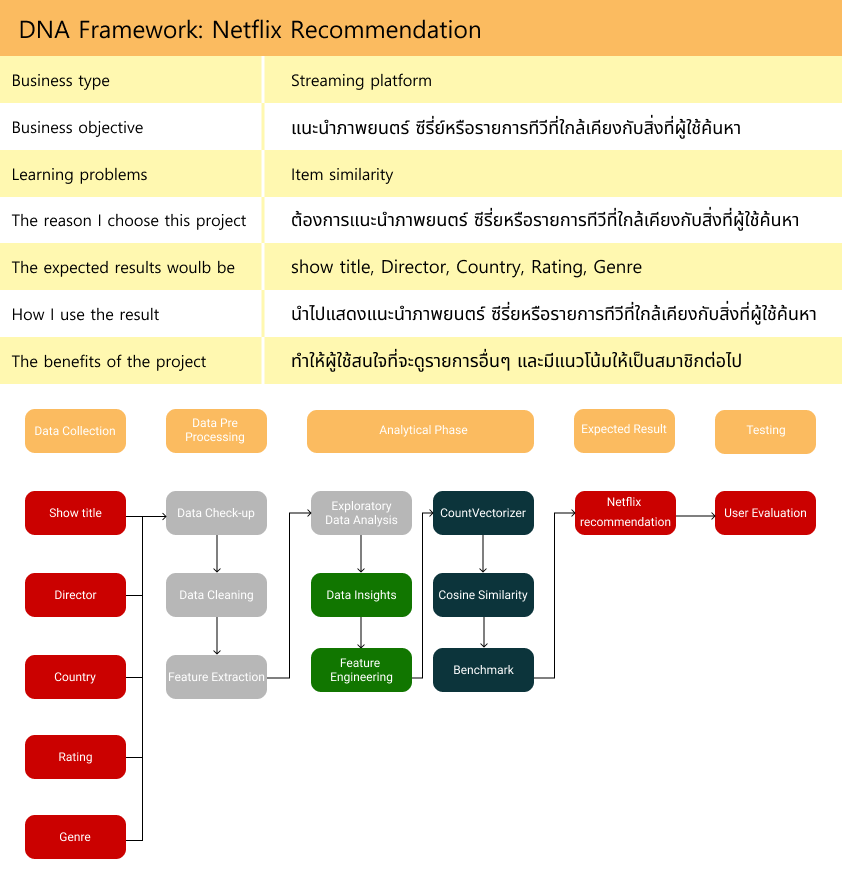

#Import

In [273]:
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

##Import Data

In [274]:
#เก็บข้อมูลลงตัวแปร df
df = pd.read_csv("https://raw.githubusercontent.com/pnzdplog/cs434Final/main/netflix_titles.csv")
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [275]:
df.shape

(8807, 12)

#Data Prepocessing

##Check Data

- ทำความเข้าใจกับข้อมูลทั้ง 12 Column

show_id = รหัสของแต่ละรายการ

type = ประเภท (ภาพยนตร์หรือรายการทีวี)

cast = นักแสดงนำ

date_added = วันที่เพิ่มเข้าใน Netflix

release_year = ปีที่ภาพยนตร์/รายการเข้าฉาย

duration = ความยาว (นาที)

description = คำอธิบาย/เรื่องย่อ



***title = ชื่อเรื่อง/รายการ***

***director = ชื่อผู้กำกับ***

***country = ประเทศที่ทำการผลิต***

***rating = ระบบจำแนกเรทภาพยนตร์/รายการ***

***listed_in = ประเภทของภาพยนตร์/รายการ***


In [276]:
#Check Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [277]:
#Check มีข้อมูลซ้ำหรือไม่ ?
df.duplicated().sum()

0

In [278]:
#Check ค่า null ในแต่ละ Column
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

##Data Cleaning

In [279]:
#Drop Row ที่มีค่า country, rating เป็น null
df = df.dropna(subset=['country', 'rating']) #ทำการ Drop เฉพาะแกน Row (แนวนอน)

In [280]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [281]:
#Reset index ที่ไม่ถูกต้องของ Dataframe df
df.reset_index(drop=True,inplace=True)
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7968,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
7969,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
7970,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7971,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7972,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [282]:
df.shape

(7973, 12)

In [283]:
#สร้างตัวแปรใหม่ เก็บเฉพาะ Column ที่จำเป็น
columns = ['title','director','country','rating','listed_in']
df[columns]

,title,director,country,rating,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,United States,PG-13,Documentaries
1,Blood & Water,NaN,South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,Kota Factory,NaN,India,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
3,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",TV-MA,"Dramas, Independent Movies, International Movies"
4,The Great British Baking Show,Andy Devonshire,United Kingdom,TV-14,"British TV Shows, Reality TV"
...,...,...,...,...,...
7968,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",TV-MA,"Dramas, International Movies, Thrillers"
7969,Zodiac,David Fincher,United States,R,"Cult Movies, Dramas, Thrillers"
7970,Zombieland,Ruben Fleischer,United States,R,"Comedies, Horror Movies"
7971,Zoom,Peter Hewitt,United States,PG,"Children & Family Movies, Comedies"


In [284]:
df_req = df[columns].copy()

In [285]:
df_req

,title,director,country,rating,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,United States,PG-13,Documentaries
1,Blood & Water,NaN,South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,Kota Factory,NaN,India,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
3,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",TV-MA,"Dramas, Independent Movies, International Movies"
4,The Great British Baking Show,Andy Devonshire,United Kingdom,TV-14,"British TV Shows, Reality TV"
...,...,...,...,...,...
7968,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",TV-MA,"Dramas, International Movies, Thrillers"
7969,Zodiac,David Fincher,United States,R,"Cult Movies, Dramas, Thrillers"
7970,Zombieland,Ruben Fleischer,United States,R,"Comedies, Horror Movies"
7971,Zoom,Peter Hewitt,United States,PG,"Children & Family Movies, Comedies"


In [286]:
# แยกแท็กด้วยการเว้นวรรค
def globalization1(strok:str):
    return strok.replace(',', ' ')

# ลบ '-' ออกไป
def globalization2(strok:str):
    return strok.replace('-', '')

# ลบ '&' ออกไป
def globalization3(strok:str):
    return strok.replace('&', '')

# แปลงตัวอักษรเป็นพิมพ์เล็ก
def to_low(strok:str):
    return strok.lower()

In [287]:
# จัดการกับเครื่องหมายพิเศษและค่า Null
df_req['listed_in'] = df_req['listed_in'].apply(globalization1)
df_req['listed_in'] = df_req['listed_in'].apply(globalization3)
df_req['country'] = df_req['country'].apply(globalization1)
df_req['rating'] = df_req['rating'].apply(globalization2)
df_req = df_req.where(pd.notnull(df_req), 'None')


In [288]:
df_req

,title,director,country,rating,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,United States,PG13,Documentaries
1,Blood & Water,None,South Africa,TVMA,International TV Shows TV Dramas TV Mysteries
2,Kota Factory,None,India,TVMA,International TV Shows Romantic TV Shows TV ...
3,Sankofa,Haile Gerima,United States Ghana Burkina Faso United Kin...,TVMA,Dramas Independent Movies International Movies
4,The Great British Baking Show,Andy Devonshire,United Kingdom,TV14,British TV Shows Reality TV
...,...,...,...,...,...
7968,Zinzana,Majid Al Ansari,United Arab Emirates Jordan,TVMA,Dramas International Movies Thrillers
7969,Zodiac,David Fincher,United States,R,Cult Movies Dramas Thrillers
7970,Zombieland,Ruben Fleischer,United States,R,Comedies Horror Movies
7971,Zoom,Peter Hewitt,United States,PG,Children Family Movies Comedies


In [289]:
# สร้าง column ใหม่สำหรับใช้ใน model

cols = ['director', 'country', 'rating', 'listed_in']

df_req['allinfo'] = df_req['title'].copy().apply(to_low)
for i in cols:
  df_req['allinfo'] += ' ' + df_req[i].apply(to_low)


In [290]:
df_req['allinfo']

0       dick johnson is dead kirsten johnson united st...
1       blood & water none south africa tvma internati...
2       kota factory none india tvma international tv ...
3       sankofa haile gerima united states  ghana  bur...
4       the great british baking show andy devonshire ...
                              ...                        
7968    zinzana majid al ansari united arab emirates  ...
7969    zodiac david fincher united states r cult movi...
7970    zombieland ruben fleischer united states r com...
7971    zoom peter hewitt united states pg children  f...
7972    zubaan mozez singh india tv14 dramas  internat...
Name: allinfo, Length: 7973, dtype: object

#EDA

In [291]:
import itertools
list_country = [x.split(', ') for x in df.dropna(subset=['country'])['country'].tolist()]
list_country = list(itertools.chain(*list_country))

from collections import Counter
df_netflix_country_count = pd.DataFrame(Counter(list_country).most_common()[:10], columns=['Country', 'Count'])

##Top 15 Netflix shows in the Rating category

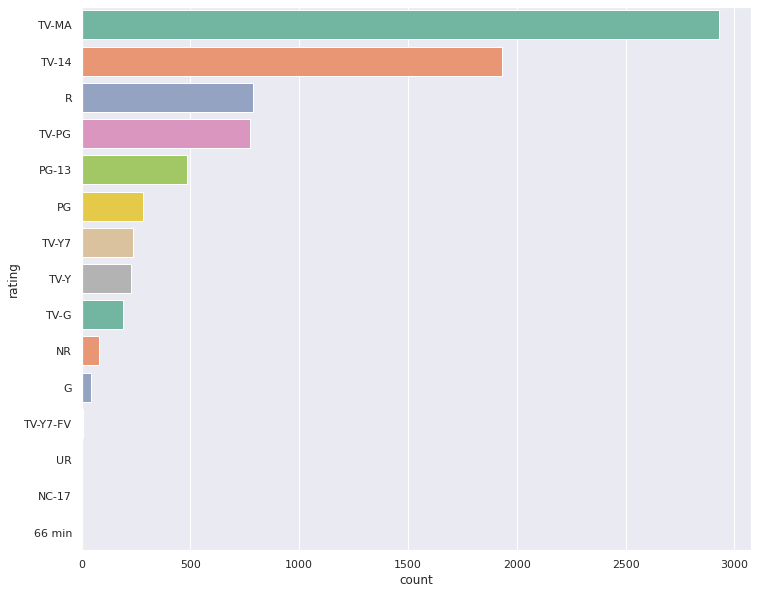

In [292]:
# แสดง 15 อันดับจำนวน content ในหมวดหมู่ Rating
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='rating', data=df, palette="Set2", order=df['rating'].value_counts().index[0:15])

##Top 15 Netflix shows in the Country category

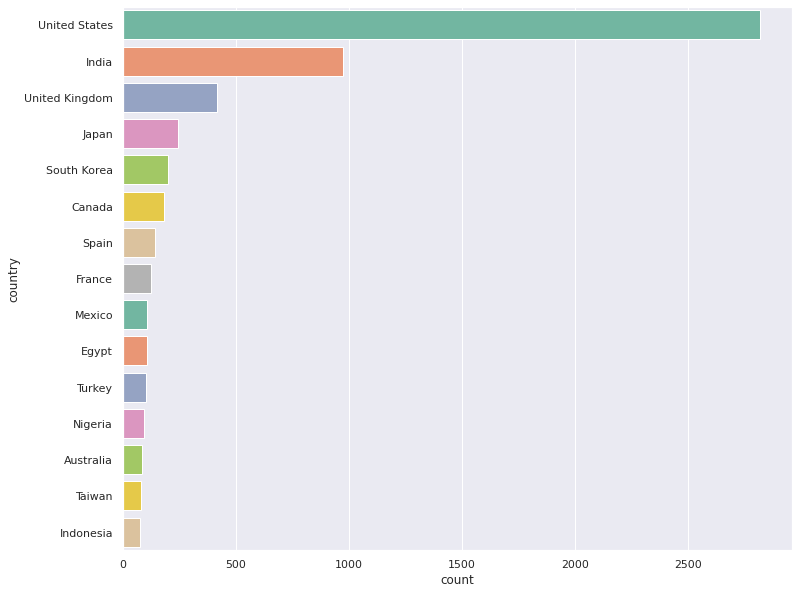

In [293]:
# แสดง 15 อันดับจำนวน content ในหมวดหมู่ Country
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='country', data=df, palette="Set2", order=df['country'].value_counts().index[0:15])

##Top 15 Netflix shows in the Director category

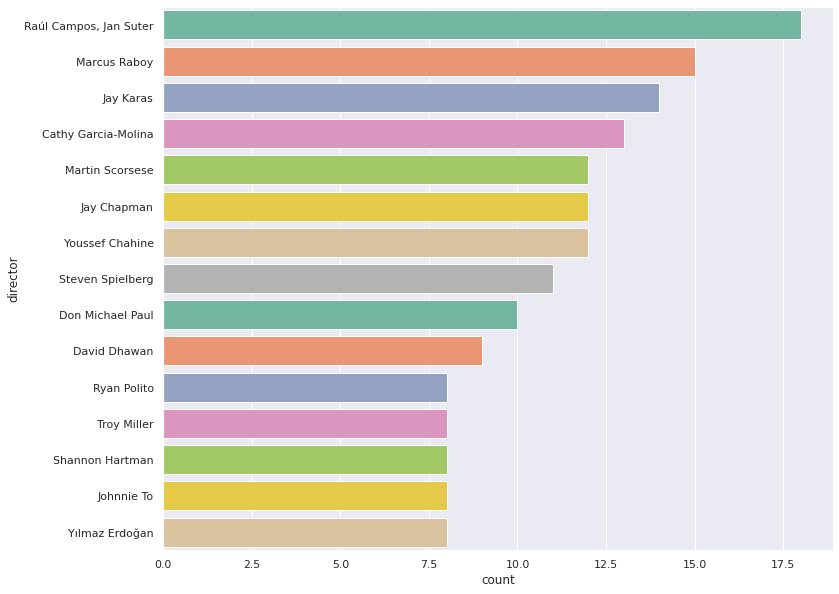

In [294]:
# แสดง 15 อันดับจำนวน content ในหมวดหมู่ Director
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='director', data=df, palette="Set2", order=df['director'].value_counts().index[0:15])

In [295]:
#เเบ่ง Genre ออกมาเเล้วนับว่าเเต่ละ Genre มีทั้งหมดกี่ประเภท
def countgenre(df):
  dicts = {}
  for x in df:
    for y in x:
      if y not in dicts.keys():
        dicts[y] = 0
      dicts[y] = int(dicts[y])+1
  return dicts

In [296]:
GENRE = 'listed_in'
GENRE = df[GENRE].str.split(", ") #เเบ่งด้วยsplit
GENRE = countgenre(GENRE)#เข้าไปในfunctionเเล้วreturnที่เเบ่งเเล้วออกมา

In [297]:
#เอา Genre เเละ จำนวนของ Genre มารวมกันเป็น Dataframe เพื่อทำกราฟ
colGenre = pd.DataFrame(data=GENRE.keys(),columns=['genre'])
rowGenre = pd.DataFrame(data=GENRE.values(),columns=['count_genre'])
colGenre.reset_index(inplace=True)
rowGenre.reset_index(inplace=True)
Genre = pd.merge(colGenre,rowGenre,on=['index','index'])
Genre

,index,genre,count_genre
0,0,Documentaries,794
1,1,International TV Shows,1127
2,2,TV Dramas,663
3,3,TV Mysteries,92
4,4,Romantic TV Shows,299
5,5,TV Comedies,500
6,6,Dramas,2316
7,7,Independent Movies,745
8,8,International Movies,2543
9,9,British TV Shows,237


##The number of items in each genre

In [298]:
# แสดงจำนวน content ในแต่ละ Genre
alt.Chart(Genre, title='Movie & TV Shows Genre').mark_bar().encode(
    x='count_genre:Q',
    y=alt.Y('genre:O', sort='-x'),
    tooltip=list(Genre.columns)
).properties(width=900,height=600)

alt.Chart(...)

มากที่สุด 3 อันดับ
- 1. International Movies = 2543 เรื่อง
- 2. Drama = 2316 เรื่อง
- 3. Comedies = 1580 เรื่อง



#Feature Engineering

**เลือกใช้ Algorithm ในการตัดคำ เป็น CountVectorizer**

**เลือกใช้ Model หาความคล้ายคลึง เป็น Cosine Similarity**

In [299]:
count = CountVectorizer(lowercase=True, stop_words = 'english')
count_matrix = count.fit_transform(df_req['allinfo'])

In [300]:
# Compute cosine similarity
cosine_sim_Count = cosine_similarity(count_matrix, count_matrix)

In [301]:
cosine_sim_Count

array([[1.        , 0.        , 0.        , ..., 0.21320072, 0.19069252,
        0.        ],
       [0.        , 1.        , 0.68516016, ..., 0.        , 0.        ,
        0.1490712 ],
       [0.        , 0.68516016, 1.        , ..., 0.07905694, 0.07071068,
        0.14142136],
       ...,
       [0.21320072, 0.        , 0.07905694, ..., 1.        , 0.4472136 ,
        0.1118034 ],
       [0.19069252, 0.        , 0.07071068, ..., 0.4472136 , 1.        ,
        0.1       ],
       [0.        , 0.1490712 , 0.14142136, ..., 0.1118034 , 0.1       ,
        1.        ]])

Create Function for testing Modeling

In [302]:
def get_req(nam:str, cosine):

    ind = df_req[df_req['title'] == nam].index.to_list()[0]
    
    cos_score = list(enumerate(cosine[ind]))
    
    cos_score = sorted(cos_score, key=lambda x: x[1], reverse=True)
    cos_score = cos_score[0:15]
    ten_ind = [i[0] for i in cos_score]
    df = df_req[['title','director','country','rating','listed_in']].iloc[ten_ind]

    score = [i[1] for i in cos_score] # Get score from var cos_score
    score = [round(num, 4) for num in score] # Convert Round(4)

    df = pd.DataFrame({'title' : df['title'],
                       'director':df['director'] ,
                       'country': df['country'],
                       'rating': df['rating'],
                       'listed_in': df['listed_in'],
                       'match_score' : score
                       })
    return df

In [303]:
df_req.loc[df_req['title'] == 'The Adventures of Tintin'][['title','director','country','rating','listed_in']]

,title,director,country,rating,listed_in
7376,The Adventures of Tintin,Steven Spielberg,United States New Zealand United Kingdom,PG,Children Family Movies


In [304]:
get_req('The Adventures of Tintin', cosine_sim_Count)

,title,director,country,rating,listed_in,match_score
7376,The Adventures of Tintin,Steven Spielberg,United States New Zealand United Kingdom,PG,Children Family Movies,1.0000
866,The BFG,Steven Spielberg,United States India United Kingdom,PG,Children Family Movies Dramas,0.7746
54,Show Dogs,Raja Gosnell,United Kingdom United States,PG,Children Family Movies Comedies,0.6682
6108,Get Santa,Christopher Smith,United Kingdom United States,PG,Children Family Movies Comedies,0.6682
6935,Penelope,Mark Palansky,United Kingdom United States,PG,Children Family Movies Comedies Romantic Mo...,0.6482
2167,What a Girl Wants,Dennie Gordon,United States United Kingdom,PG,Children Family Movies Comedies,0.6455
2224,The Willoughbys,Kris Pearn,Canada United States United Kingdom,PG,Children Family Movies Comedies,0.6455
2413,Hugo,Martin Scorsese,United Kingdom United States France,PG,Children Family Movies Dramas,0.6455
4013,Big Miracle,Ken Kwapis,United States United Kingdom,PG,Children Family Movies Dramas,0.6455
5498,Arthur Christmas,Sarah Smith,United Kingdom United States,PG,Children Family Movies Comedies,0.6455


#Modeling

## Benchmark

***Cosine Similarity or Linear kernel***


นำ TfidfVectorizer และ CountVectorizer

มาใช้กับ Model Cosine Similarity และ Linear kernel ในการทดสอบ


### ผล Benchmark : Cosine Similarity

**Cosine Similarity - TfidfVectorizer**

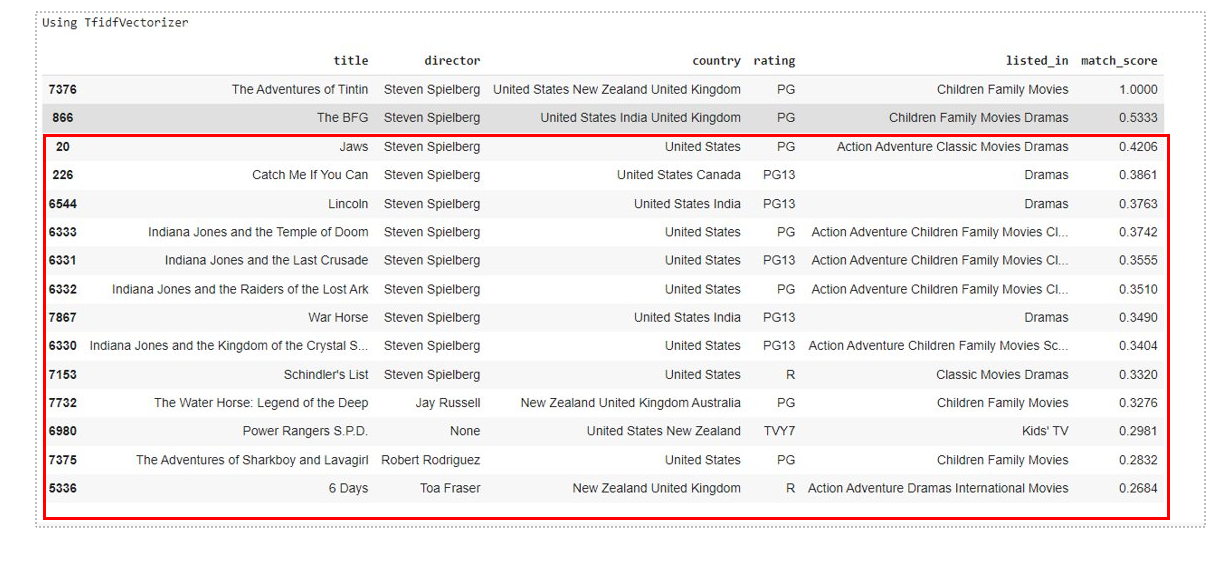

**Cosine Similarity - CountVectorizer**

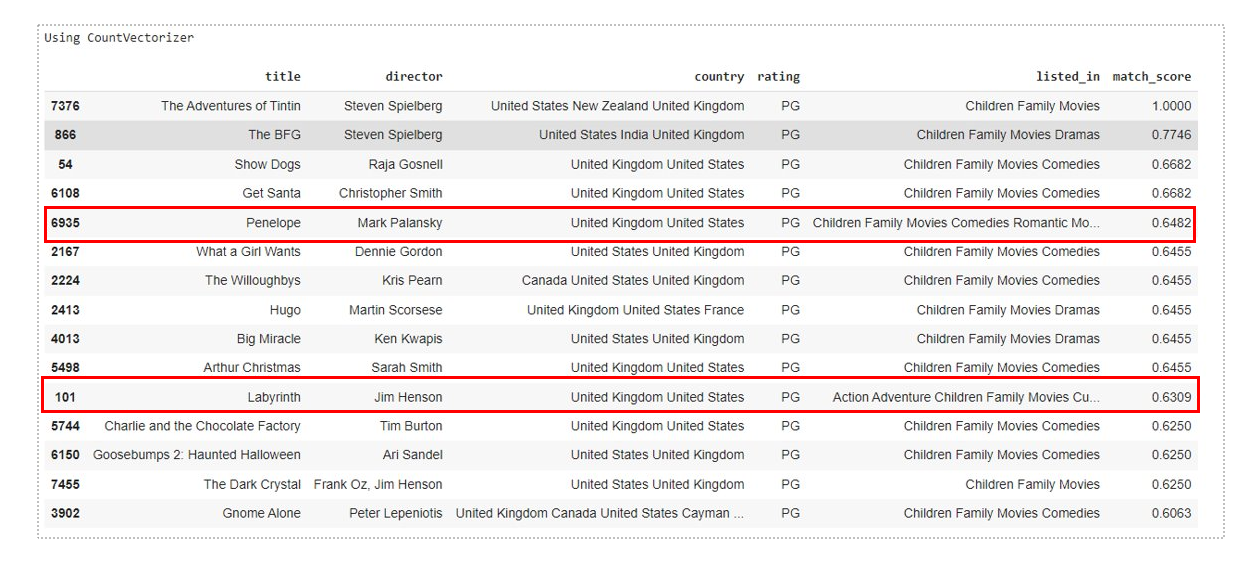

**Time Performance**

TfidfVectorizer : 1.62 s

CountVectorizer : 1.54 s

### ผล Benchmark : Linear Kernel



**Linear Kernel - TfidfVectorizer**

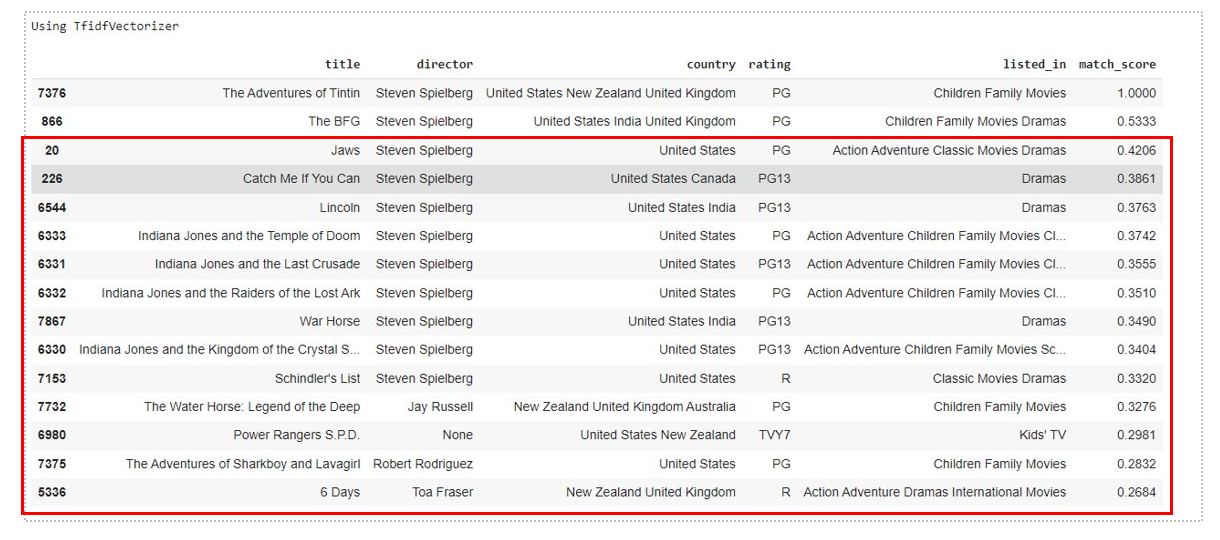

**Linear Kernel - CountVectorizer**

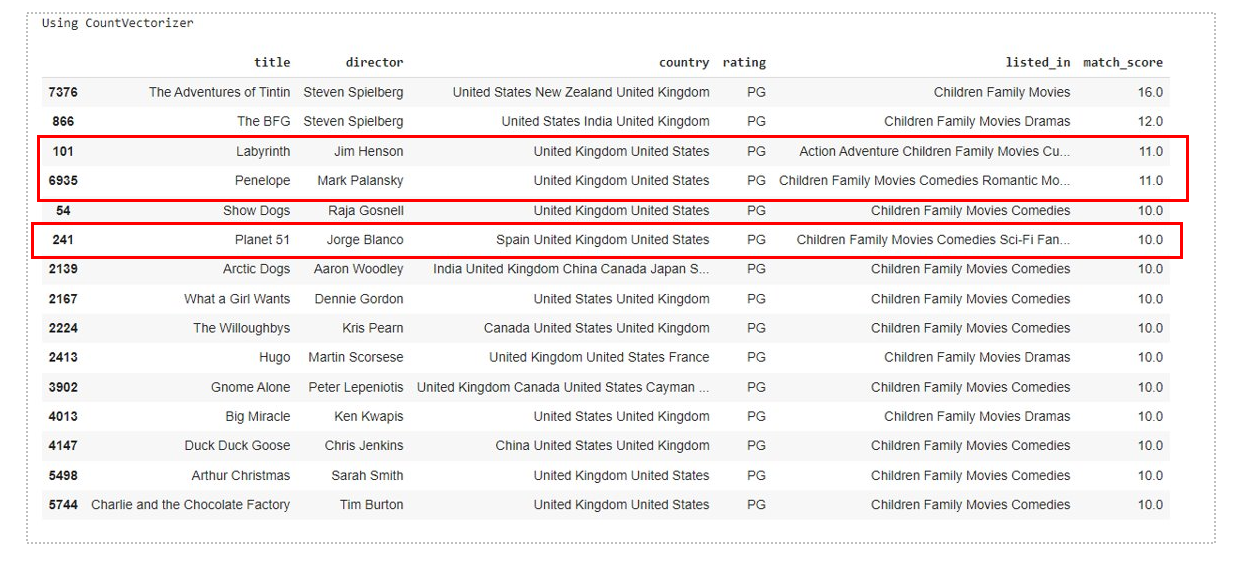

**Performance**

TfidfVectorizer : 1.75 s

CountVectorizer : 1.64 s

## สรุปผล Benchmark 

**Cosine Similarity จับคู่ TfidfVectorizer**
- ใช้เวลา 1.62 s
- ข้อมูลไม่ค่อยใกล้เคียง

***Cosine Similarity จับคู่ CountVectorizer***
- ใช้เวลา 1.54 s
- ข้อมูลใกล้เคียงมากที่สุด

**Linear Kernel จับคู่ TfidfVectorizer**
- ใช้เวลา 1.75 s
- ข้อมูลไม่ค่อยใกล้เคียง

**Linear Kernel จับคู่ CountVectorizer**
- ใช้เวลา 1.64 s
- ข้อมูลใกล้เคียงมาก

***Final Choosing*** : **Cosine Similarity / CountVectorizer**

เพราะข้อมูลมีความใกล้เคียงมากที่สุด และใช้เวลาน้อยที่สุด

#Pipeline

In [305]:
class PipeLine():
    def __init__(self,data):
        self.data = data.copy()

    def data_cleaning(self, data):
      #Drop Row ที่มีค่า cast, country, rating เป็น null
      data = data.dropna(subset=['country', 'rating'])
      #Reset index ที่ไม่ถูกต้องของ Dataframe df
      data.reset_index(drop=True,inplace=True)
      return data

    def transform(self, data):

      columns = ['show_id','title','director','country','rating','listed_in']
      data = data[columns].copy()
      
      # แยกแท็กด้วยการเว้นวรรค
      def globalization1(strok:str):
          return strok.replace(',', ' ')

      # ลบ '-' ออกไป
      def globalization2(strok:str):
          return strok.replace('-', '')

      # ลบ '&' ออกไป
      def globalization3(strok:str):
          return strok.replace('&', '')

      # แปลงตัวอักษรเป็นพิมพ์เล็ก
      def to_low(strok:str):
          return strok.lower()

      # จัดการกับเครื่องหมายพิเศษ
      data['listed_in'] = data['listed_in'].apply(globalization1)
      data['listed_in'] = data['listed_in'].apply(globalization3)
      data['rating'] = data['rating'].apply(globalization2)
      data = data.where(pd.notnull(data), 'None')

      # สร้าง column ใหม่สำหรับใช้ใน model
      cols = ['director', 'country', 'rating', 'listed_in']

      data['allinfo'] = data['title'].copy().apply(to_low)
      for i in cols:
        data['allinfo'] += ' ' + data[i].apply(to_low)


      return data
    
    def count_fit_transform(self, data):
      count_vec = CountVectorizer(stop_words='english')
      count_matrix = count_vec.fit_transform(data['allinfo'])
      # Compute cosine similarity
      return count_matrix
    
    def execution(self, data):
      df = data.copy()
      df = self.data_cleaning(df)
      df = self.transform(df)

      return self.count_fit_transform(df)

Pipeline will Return count_matrix

In [306]:
pipeline = PipeLine(df)

In [307]:
count_matrix = pipeline.execution(df)

In [308]:
count_matrix

<7973x13530 sparse matrix of type '<class 'numpy.int64'>'
	with 81261 stored elements in Compressed Sparse Row format>

In [309]:
cosine_sim_Count = cosine_similarity(count_matrix, count_matrix)

In [310]:
show_name = "The Adventures of Tintin"
get_req(show_name, cosine_sim_Count)

,title,director,country,rating,listed_in,match_score
7376,The Adventures of Tintin,Steven Spielberg,United States New Zealand United Kingdom,PG,Children Family Movies,1.0000
866,The BFG,Steven Spielberg,United States India United Kingdom,PG,Children Family Movies Dramas,0.7746
54,Show Dogs,Raja Gosnell,United Kingdom United States,PG,Children Family Movies Comedies,0.6682
6108,Get Santa,Christopher Smith,United Kingdom United States,PG,Children Family Movies Comedies,0.6682
6935,Penelope,Mark Palansky,United Kingdom United States,PG,Children Family Movies Comedies Romantic Mo...,0.6482
2167,What a Girl Wants,Dennie Gordon,United States United Kingdom,PG,Children Family Movies Comedies,0.6455
2224,The Willoughbys,Kris Pearn,Canada United States United Kingdom,PG,Children Family Movies Comedies,0.6455
2413,Hugo,Martin Scorsese,United Kingdom United States France,PG,Children Family Movies Dramas,0.6455
4013,Big Miracle,Ken Kwapis,United States United Kingdom,PG,Children Family Movies Dramas,0.6455
5498,Arthur Christmas,Sarah Smith,United Kingdom United States,PG,Children Family Movies Comedies,0.6455


#Deployment

In [311]:
!pip install gradio -q

In [312]:
import gradio as gr

Start Deploy 

In [313]:
def deployReccomendations(name):
  df = get_req(name, cosine_sim_Count)
  return df

In [314]:
# input
name_input = gr.inputs.Textbox(label='Netflix Show', default="The Adventures of Tintin")

# output
result = gr.outputs.Dataframe(label='Your Netflix Reccomendation Here!')

iface = gr.Interface(deployReccomendations,inputs=name_input,outputs=result)
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://45385.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7865/',
 'https://45385.gradio.app')

# Reference

**Project Reference**

*   **Book**(Reccomendation)
      
      :https://www.kaggle.com/hoshi7/goodreads-analysis-and-recommending-books/notebook

*   **Netflix**(Reccomendation)
      
      :https://www.kaggle.com/eward96/netflix-recommendation-engine


*   **Anime**(Reccomendation) 

      :https://github.com/MacClay/CS434/blob/main/cs434_finalexam__อีหยังวะ_ห้วย_!_.ipynb

*   **Steam**(Reccomendation) 

      :https://github.com/Parisleah/cs434_finalexam/blob/main/cs434_finalexam__Honตี้5.ipynb



